## Langchain 으로 LLM API 호출

In [27]:
question = "대한민국의 수도는 어디야?"

In [ ]:
from langchain.chat_models import init_chat_model

model = init_chat_model("openai:gpt-4.1-mini")
response = model.invoke(question)

print(response)

content='대한민국의 수도는 서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 15, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CWX29I8CIaDX48Z5pZA3Qu3kijTnd', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--7f0e2cb0-8414-43ab-96cd-990338c87fc7-0' usage_metadata={'input_tokens': 15, 'output_tokens': 8, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4.1-mini")
response = model.invoke(question)

print(response)

content='대한민국의 수도는 서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 15, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CWX38UUtHEmMVjeIN5Wh13QX03KjM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--f51cd309-0b37-4be3-9d6f-75d158671277-0' usage_metadata={'input_tokens': 15, 'output_tokens': 8, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [35]:
from langchain_core.output_parsers import StrOutputParser


model = ChatOpenAI(model="gpt-4.1-mini")
chain = model | StrOutputParser()
response = chain.invoke(question)

print(response)

대한민국의 수도는 서울특별시입니다.


In [34]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("{country}의 수도는 어디야?")

model = ChatOpenAI(model="gpt-4.1-mini")
chain = prompt | model | StrOutputParser()
response = chain.invoke({"country": "대한민국"})

print(response)

대한민국의 수도는 서울특별시입니다.


In [31]:
full = None  # None | AIMessageChunk
for chunk in model.stream(question):
    full = chunk if full is None else full + chunk
    print(full.text)

print(full.content_blocks)


대한
대한민국
대한민국의
대한민국의 수도
대한민국의 수도는
대한민국의 수도는 서울
대한민국의 수도는 서울입니다
대한민국의 수도는 서울입니다.
대한민국의 수도는 서울입니다.
대한민국의 수도는 서울입니다.
대한민국의 수도는 서울입니다.
[{'type': 'text', 'text': '대한민국의 수도는 서울입니다.'}]


## Langchain 으로 아주 간단한 Agent 만들기

In [17]:
import pprint
from langchain.agents import create_agent

def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

agent = create_agent(
    model="openai:gpt-4o-mini",
    tools=[get_weather],
    system_prompt="You are a helpful assistant",
)

# Run the agent
result = agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]}
)

pprint.pprint(result['messages'])

[HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='f1d5553b-c43f-426e-bd73-75e80797a657'),
 AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 56, 'total_tokens': 71, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CWWu3E6SJrV4ystKQatt4G0rO8tZM', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--65486baa-c0aa-4ef6-b35a-dded28ebfff6-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'}, 'id': 'call_nrFGPHXzC5smwJjBifrgQ9YI', 'type': 'tool_call'}], usage_metadata={'input_tokens': 56, 'output_tokens': 15, 'total_tokens': 71,

In [ ]:
for m in result['messages']:
    print(f"{m.type}: {m.content or m.tool_calls}")

human: what is the weather in sf
ai: [{'name': 'get_weather', 'args': {'city': 'San Francisco'}, 'id': 'call_nrFGPHXzC5smwJjBifrgQ9YI', 'type': 'tool_call'}]
tool: It's always sunny in San Francisco!
ai: The weather in San Francisco is sunny!


In [22]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "대한민국의 수도가 어디야?"}]}
)

for m in result['messages']:
    print(f"{m.type}: {m.content or m.tool_calls}")

human: 대한민국의 수도가 어디야?
ai: 대한민국의 수도는 서울입니다.


## LangGraph 시작하기

### 1. Define tools and model

In [36]:
from langchain.tools import tool
from langchain.chat_models import init_chat_model


model = init_chat_model(
    "openai:gpt-4o-mini",
    temperature=0
)


# Define tools
@tool
def multiply(a: int, b: int) -> int:
    """Multiply `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a * b


@tool
def add(a: int, b: int) -> int:
    """Adds `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a + b


@tool
def divide(a: int, b: int) -> float:
    """Divide `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a / b


# Augment the LLM with tools
tools = [add, multiply, divide]
tools_by_name = {tool.name: tool for tool in tools}
model_with_tools = model.bind_tools(tools)

### 2. Define state

In [37]:
from langchain.messages import AnyMessage
from typing_extensions import TypedDict, Annotated
import operator


class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
    llm_calls: int

### 3. Define model node

In [38]:
from langchain.messages import SystemMessage


def llm_call(state: dict):
    """LLM decides whether to call a tool or not"""

    return {
        "messages": [
            model_with_tools.invoke(
                [
                    SystemMessage(
                        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."
                    )
                ]
                + state["messages"]
            )
        ],
        "llm_calls": state.get('llm_calls', 0) + 1
    }

### 4. Define node and end logic

In [39]:
from langchain.messages import ToolMessage
from typing import Literal
from langgraph.graph import StateGraph, START, END

def tool_node(state: dict):
    """Performs the tool call"""

    result = []
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
    return {"messages": result}


def should_continue(state: MessagesState) -> Literal["tool_node", END]:
    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""

    messages = state["messages"]
    last_message = messages[-1]

    # If the LLM makes a tool call, then perform an action
    if last_message.tool_calls:
        return "tool_node"

    # Otherwise, we stop (reply to the user)
    return END

### Build and compile the agent

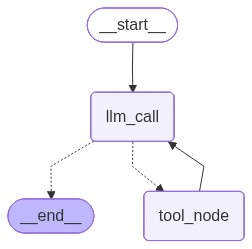

================================ Human Message =================================

3 더하기 4는 몇이야?
================================== Ai Message ==================================
Tool Calls:
  add (call_7s4acE6EWcQ2SIhLSyg1a6Xw)
 Call ID: call_7s4acE6EWcQ2SIhLSyg1a6Xw
  Args:
    a: 3
    b: 4
================================= Tool Message =================================

7
================================== Ai Message ==================================

3 더하기 4는 7입니다.


In [41]:
# Build workflow
agent_builder = StateGraph(MessagesState)

# Add nodes
agent_builder.add_node("llm_call", llm_call)
agent_builder.add_node("tool_node", tool_node)

# Add edges to connect nodes
agent_builder.add_edge(START, "llm_call")
agent_builder.add_conditional_edges(
    "llm_call",
    should_continue,
    ["tool_node", END]
)
agent_builder.add_edge("tool_node", "llm_call")

# Compile the agent
agent = agent_builder.compile()

# Show the agent
from IPython.display import Image, display
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

# Invoke
from langchain.messages import HumanMessage
messages = [HumanMessage(content="3 더하기 4는 몇이야?")]
messages = agent.invoke({"messages": messages})
for m in messages["messages"]:
    m.pretty_print()

In [42]:
messages = [HumanMessage(content="3 곱하기 4를 하고 더하기 5 하고 나누기 2 하면 몇이야?")]
messages = agent.invoke({"messages": messages})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

3 곱하기 4를 하고 더하기 5 하고 나누기 2 하면 몇이야?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_hoHTqrcVqMBk0NCBd44xlw9h)
 Call ID: call_hoHTqrcVqMBk0NCBd44xlw9h
  Args:
    a: 3
    b: 4
  add (call_Sj8kOTis6dpFbVlJA2el6OFe)
 Call ID: call_Sj8kOTis6dpFbVlJA2el6OFe
  Args:
    a: 12
    b: 5
  divide (call_YhpO4YyiBo0vIv437FFh8p3Z)
 Call ID: call_YhpO4YyiBo0vIv437FFh8p3Z
  Args:
    a: 17
    b: 2
================================= Tool Message =================================

12
================================= Tool Message =================================

17
================================= Tool Message =================================

8.5
================================== Ai Message ==================================

3 곱하기 4는 12이고, 여기에 5를 더하면 17입니다. 마지막으로 17을 2로 나누면 8.5가 됩니다. 따라서 결과는 8.5입니다.
